In [ ]:
pip install C45

ERROR: Could not find a version that satisfies the requirement C45 (from versions: none)
ERROR: No matching distribution found for C45


# Preprocessing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')
#  Tampilkan 5 data pertama
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
# hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import sklearn
from sklearn.model_selection import train_test_split

## Bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test), len(x_train)

(30, 120)

# Decision Tree

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [39, 40, 41]'),
 Text(0.4, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 81\nvalue = [0, 40, 41]'),
 Text(0.4, 0.5833333333333334, 'X[2] <= 5.3\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 4.95\nentropy = 0.169\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.2, 0.25, 'X[1] <= 2.45\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.5, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.4166666666666667, 'X[0] <= 5.95\nentropy 

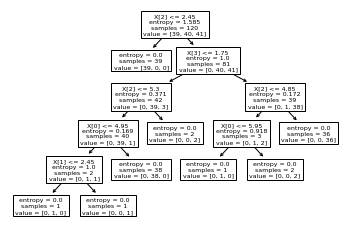

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Create model
model_tree = DecisionTreeClassifier(criterion='entropy')
# Training model
model_tree.fit(x_train, y_train)
# Tampilkan tree
tree.plot_tree(model_tree)

In [5]:
# Predict model
pred_tree = model_tree.predict(x_test)
# Evaluate using data test
accuracy = (pred_tree == y_test).sum()/len(y_test)
accuracy

0.9333333333333333

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_tree, y_test)
cm

array([[11,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  7]])

In [ ]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[1, 2, 3, 4, 5, 6, 7], [29, 19, 18, 25, 17, 18, 22]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print("stat value is " + str(p))
print("dof value is " + str(p))
print("expected value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.23519867012513918
stat value is 0.23519867012513918
dof value is 0.23519867012513918
expected value is 0.23519867012513918
Independent (H0 holds true)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.DataFrame({
    'Kelurahan' : [1, 2, 3, 4, 5, 6, 7],
    'pendukung' : [29, 19, 18, 25, 17, 18, 22]
})

# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

           Kelurahan  pendukung
Kelurahan   0.000000   0.318573
pendukung   0.466881   0.000000


In [ ]:
df

,Kelurahan,pendukung
0,1,29
1,2,19
2,3,18
3,4,25
4,5,17
5,6,18
6,7,22


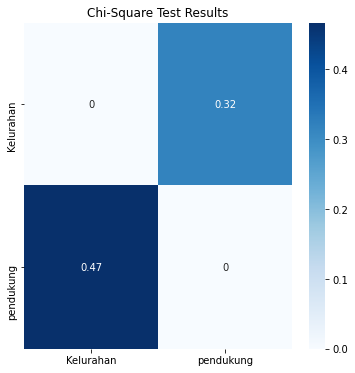

In [ ]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [ ]:
expected =  np.outer(df["pendukung"],148 / 148)

expected = pd.DataFrame(expected)

expected.columns = ["Pendukung"]
expected.index = [1,2,3,4,5,6,7]

expected

,Pendukung
1,29.0
2,19.0
3,18.0
4,25.0
5,17.0
6,18.0
7,22.0


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


In [ ]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]

expected

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


In [ ]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.518479392948842


In [ ]:
stats.chi2_contingency(observed= observed)

(7.169321280162059, 0.518479392948842, 8, array([[ 23.82 ,  11.16 ,  25.02 ],
        [ 61.138,  28.644,  64.218],
        [ 99.647,  46.686, 104.667],
        [ 15.086,   7.068,  15.846],
        [197.309,  92.442, 207.249]]))

In [ ]:
pip install info_gain

In [ ]:
data = pd.DataFrame({
    'produce' : ['apple', 'apple', 'apple', 'strawberry', 'eggplant'],
    'color' : ['green', 'green', 'red'  , 'red', 'purple'  ],
    'fruit' : [ True, True, True , True, False]
})

In [ ]:
data

,produce,color,fruit
0,apple,green,True
1,apple,green,True
2,apple,red,True
3,strawberry,red,True
4,eggplant,purple,False


In [ ]:
from info_gain import info_gain

ig  = info_gain.info_gain(data["fruit"], data["color"])
iv  = info_gain.intrinsic_value(data["fruit"], data["color"])
igr = info_gain.info_gain_ratio(data["fruit"], data["color"])

print(ig, iv, igr)

0.5004024235381879 1.5219280948873621 0.3287950496604918


In [ ]:
data_atr =  data.columns
feature = data_atr[0:2]

In [ ]:
color_obj = data["color"].unique()

In [ ]:
color_obj

array(['green', 'red', 'purple'], dtype=object)

In [ ]:
IGR = []

In [ ]:
for i in feature:
  print(i)
  temp_igr = info_gain.info_gain_ratio(data["fruit"], data[i])
  IGR.append(temp_igr)

produce
color


In [ ]:
IGR

[0.36500398013047, 0.3287950496604918]